In [2]:
import numpy as np
import matplotlib.pyplot as plt
from keras import layers
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Dropout, concatenate, Flatten, UpSampling2D,Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D
from keras.models import Model, load_model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.initializers import glorot_uniform
import scipy.misc
from matplotlib.pyplot import imshow
%matplotlib inline

import keras.backend as K
K.set_image_data_format('channels_last')
K.set_learning_phase(1)

/home/ubuntu/anaconda3/envs/tensorflow2_p38/lib/python3.8/site-packages/keras/backend.py:414: UserWarning: `tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.
  warnings.warn('`tf.keras.backend.set_learning_phase` is deprecated and '


In [3]:
X_train = np.load('X_train_final.npy')
Y_train = np.load('Y_train_final.npy')
[m, n_h, n_w, n_c] = X_train.shape
X_val = np.load('X_val_fire.npy')
Y_val = np.load('Y_val_fire.npy')
X_test = np.load('X_test_fire.npy')
Y_test = np.load('Y_test_fire.npy')


In [5]:
def dice_coef(y_true, y_pred, smooth=1):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)

def iou(y_true, y_pred, smooth=1):
    intersection = K.sum(y_true * y_pred)
    sum_ = K.sum(y_true + y_pred)
    jac = (intersection + smooth) / (sum_ - intersection + smooth)
    return jac

model = load_model('V2_250', custom_objects={"dice_coef": dice_coef, "iou": iou})

2022-06-01 06:19:35.477043: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-06-01 06:19:35.477105: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (ip-172-31-22-219): /proc/driver/nvidia/version does not exist
2022-06-01 06:19:35.477604: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [6]:
model.evaluate(X_val, Y_val)

26/26 [==============================] - 1s 16ms/step - loss: 0.1391 - dice_coef: 0.2577 - iou: 0.1495


[0.13906754553318024, 0.2577064037322998, 0.1494782418012619]

In [7]:
model.evaluate(X_test, Y_test)

32/32 [==============================] - 1s 16ms/step - loss: 0.1849 - dice_coef: 0.2154 - iou: 0.1216


[0.18493273854255676, 0.21536588668823242, 0.12164723873138428]

In [20]:
def plot_val(i):
    x = X_val[i,:,:,:]
    x = np.expand_dims(x, axis=0)
    y = model.predict(x)
    y = np.where(y>0.5, 1, 0)
    plt.figure(figsize = (20,6))
    plt.subplot(121)
    plt.imshow(Y_val[i,:,:], cmap='Wistia')
    plt.title('True Fire Mask')
    plt.colorbar()
    plt.clim([0,1])
    plt.subplot(122)
    plt.imshow(y[0,:,:,0], cmap='Wistia')
    plt.title('Predicted Fire Mask')
    plt.colorbar()
    plt.clim([0,1])
    plt.clim([0,1])
    plt.suptitle('Previous Day Mask, True Mask v/s Prediction (Val Data) #{}'.format(i), fontsize=15)
    
def plot_test(i):
    x = X_test[i,:,:,:]
    x = np.expand_dims(x, axis=0)
    y = model.predict(x)
    y = np.where(y>0.5, 1, 0)
    plt.figure(figsize = (20,6))
    plt.subplot(121)
    plt.imshow(Y_test[i,:,:], cmap='Wistia')
    plt.title('True Fire Mask')
    plt.colorbar()
    plt.clim([0,1])
    plt.subplot(122)
    plt.imshow(y[0,:,:,0], cmap='Wistia')
    plt.title('Predicted Fire Mask')
    plt.colorbar()
    plt.clim([0,1])
    plt.clim([0,1])
    plt.suptitle('Previous Day Mask, True Mask v/s Prediction (Test Data) #{}'.format(i), fontsize=15)
    

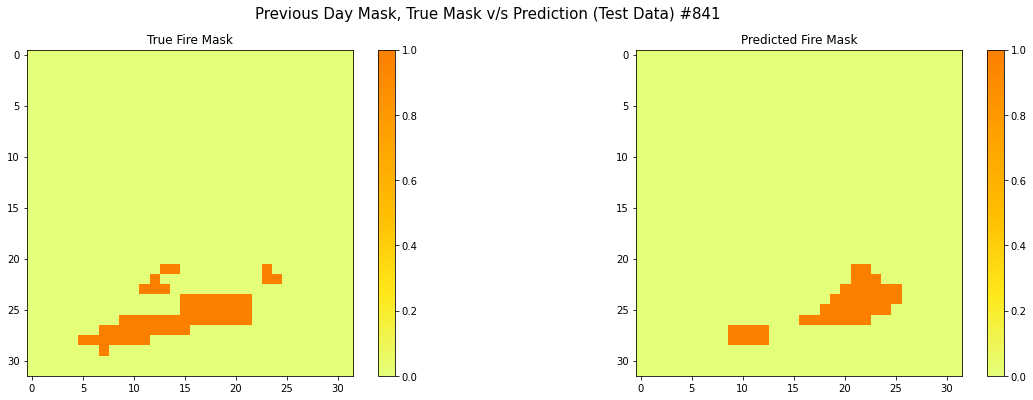

In [21]:
plot_test(841)

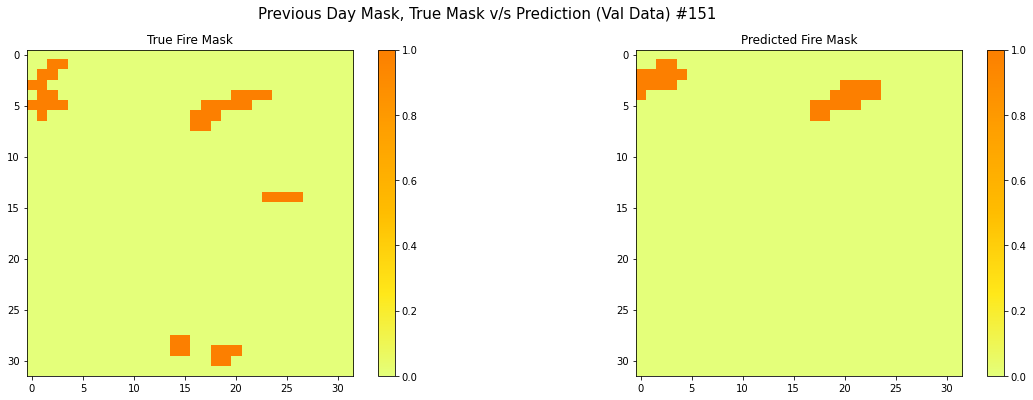

In [22]:
plot_val(151)